<a href="https://colab.research.google.com/github/felipe-ml/portif-lio/blob/main/Previs%C3%A3o_de_faturamento_produtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from datetime import datetime
import numpy as np
import os

In [ ]:
df = pd.read_excel('/content/previsão.xlsx')
df['ANO_MES'] = pd.to_datetime(df['ANO_MES'], dayfirst=True)
df.head()

,ANO_MES,Venda R$,Plan1.Regional
0,2021-01-01,115.88,Norte
1,2021-01-01,33.39,Norte
2,2021-01-01,158.69,Norte
3,2021-01-01,1072.13,Norte
4,2021-01-01,2317.97,Norte


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df['ANO_MES'] = pd.to_datetime(df['ANO_MES'])
df['ANO_MES'] = df['ANO_MES'].dt.to_period("M")
df['ANO_MES'] = df['ANO_MES'].dt.to_timestamp()
df['ANO_MES'] = pd.to_datetime(df['ANO_MES'], dayfirst=True)
df = df.groupby(['Plan1.Regional','ANO_MES'])['Venda R$'].sum().reset_index()
print(df)
df.info()
df.head()

   Plan1.Regional    ANO_MES      Venda R$
0         Central 2021-01-01  5.009661e+08
1         Central 2021-02-01  4.546310e+08
2         Central 2021-03-01  4.804145e+08
3         Central 2021-04-01  4.623363e+08
4         Central 2021-05-01  4.918780e+08
..            ...        ...           ...
91            Sul 2022-08-01  9.238327e+08
92            Sul 2022-09-01  9.612649e+08
93            Sul 2022-10-01  1.105427e+09
94            Sul 2022-11-01  1.064181e+09
95            Sul 2022-12-01  1.469636e+09

[96 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Plan1.Regional  96 non-null     object        
 1   ANO_MES         96 non-null     datetime64[ns]
 2   Venda R$        96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.4+ KB


,Plan1.Regional,ANO_MES,Venda R$
0,Central,2021-01-01,5.009661e+08
1,Central,2021-02-01,4.546310e+08
2,Central,2021-03-01,4.804145e+08
3,Central,2021-04-01,4.623363e+08
4,Central,2021-05-01,4.918780e+08


In [ ]:
# Renomear as colunas
novos_nomes = {'Plan1.Regional': 'Grupo de produtos', 'ANO_MES': 'Data', 'Venda R$':'Valor'}
df = df.rename(columns=novos_nomes)

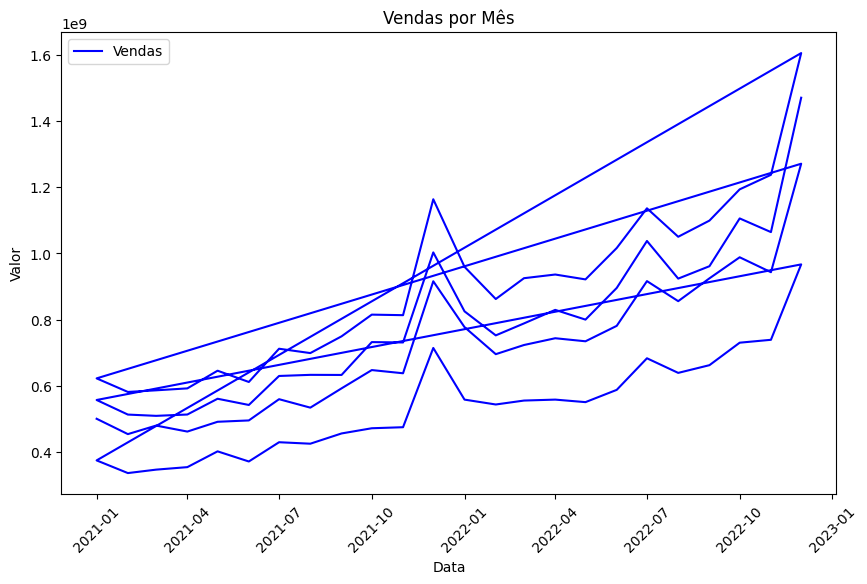

In [ ]:
# Configure o tamanho do gráfico, se desejar
plt.figure(figsize=(10, 6))

# Plote os dados
plt.plot(df['Data'], df['Valor'], color='blue', label='Vendas')

# Configure o rótulo dos eixos
plt.xlabel('Data')
plt.ylabel('Valor')

# Adicione um título ao gráfico
plt.title('Vendas por Mês')

# Rotacione os rótulos do eixo X para torná-los legíveis (opcional)
plt.xticks(rotation=45)

# Mostre a legenda
plt.legend()

# Mostre o gráfico
plt.show()

In [ ]:
df['Grupo de produtos'] = df['Grupo de produtos'].str.strip().str.lower()
grupo_produto_unicos = df['Grupo de produtos'].drop_duplicates().tolist()
print(grupo_produto_unicos)
for grupo_produto in grupo_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]
    rolmean = df['Valor'].rolling(window=12).mean()
    rolstd = df['Valor'].rolling(window=12).std()

['central', 'norte', 'oeste', 'sul']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Grupo de produtos  96 non-null     object        
 1   Data               96 non-null     datetime64[ns]
 2   Valor              96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.4+ KB


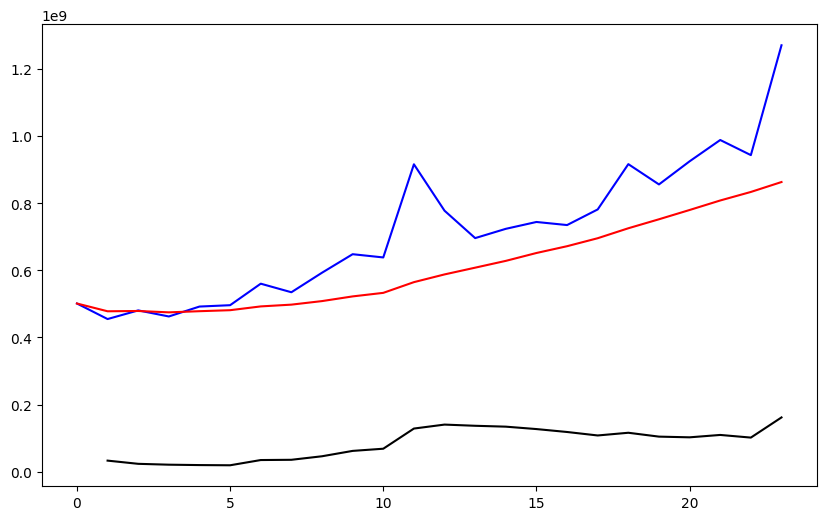

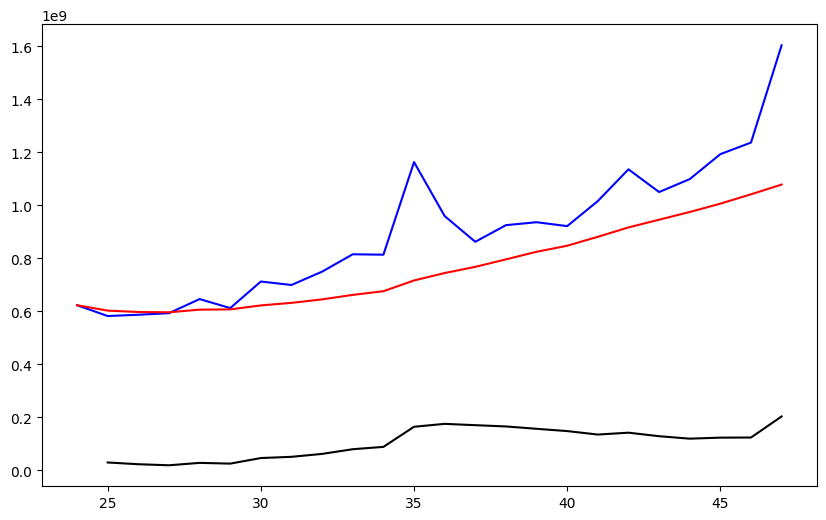

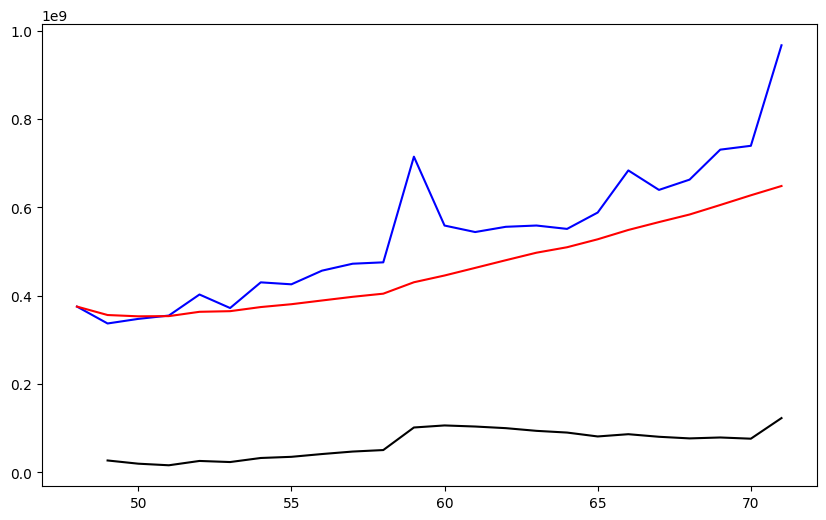

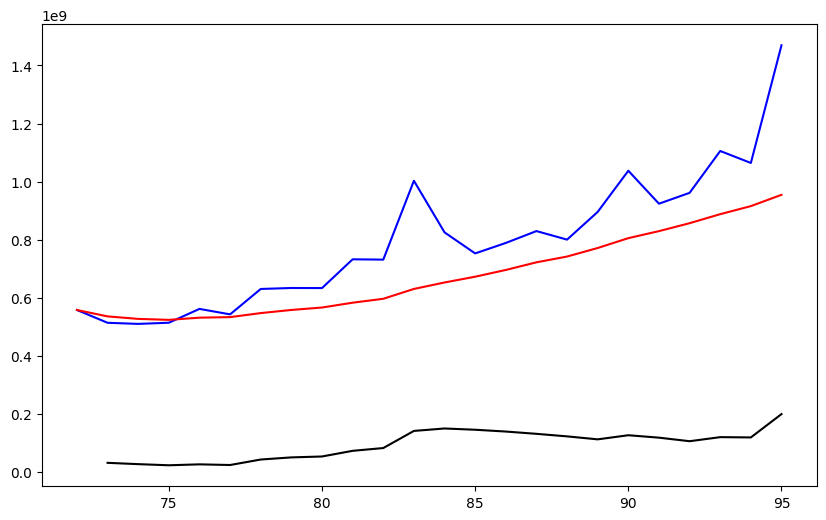

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

codigos_produto_unicos = df['Grupo de produtos'].unique()
window_size = 12

for grupo_produto in grupo_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]
    # Determine rolling statistics
    rolmean = df_produto['Valor'].rolling(window=window_size, min_periods=1).mean()
    rolstd = df_produto['Valor'].rolling(window=window_size, min_periods=1).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(df_produto['Valor'], color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')


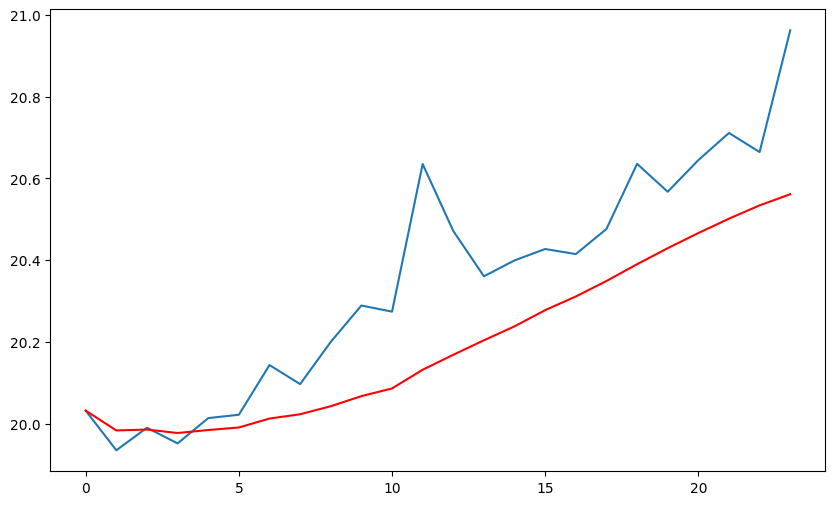

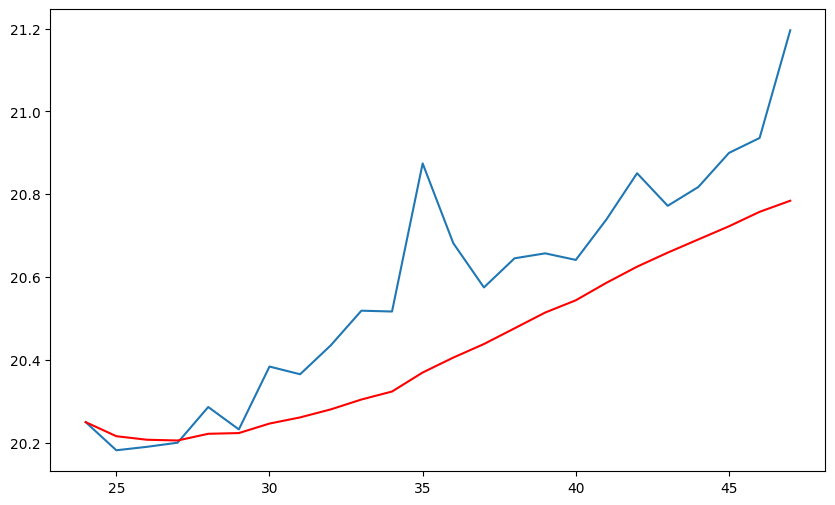

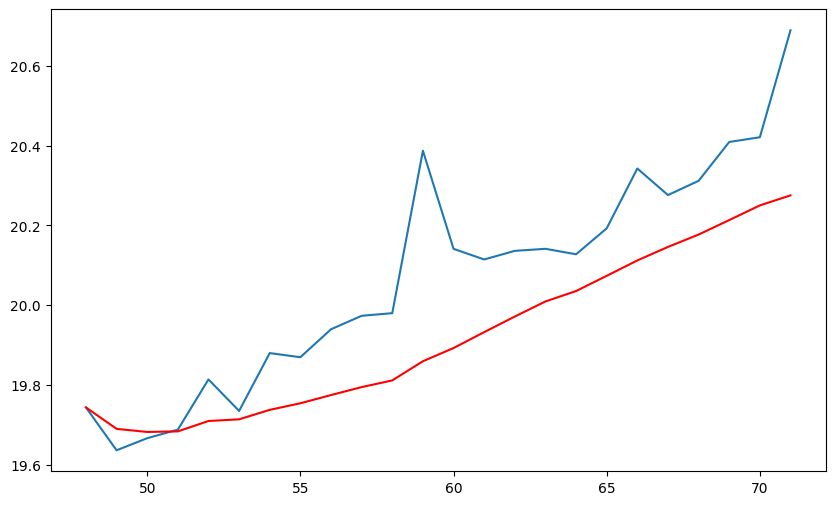

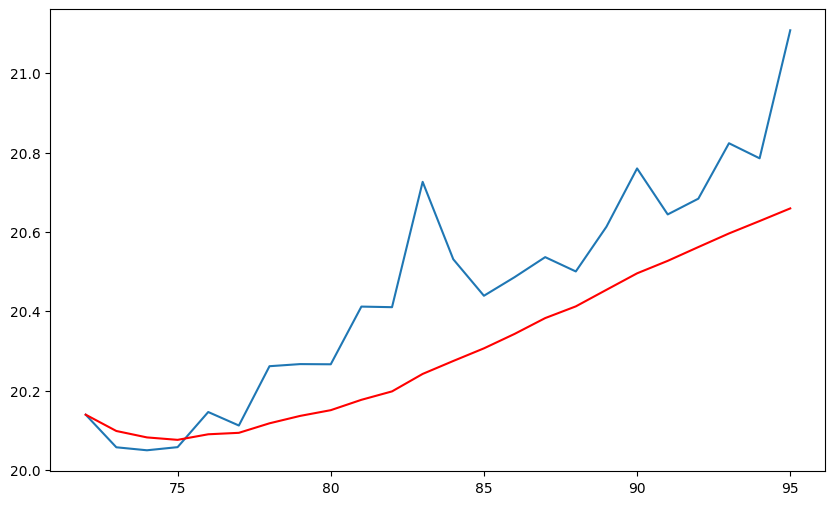

In [ ]:
import numpy as np

codigos_produto_unicos = df['Grupo de produtos'].unique()
window= 12

for grupo_produto in grupo_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]

    # Estimating trend
    logScale = np.log(df_produto['Valor'])

    # The below transformation is required to make series stationary
    movingAverage = logScale.rolling(window,min_periods=1).mean()
    movingSTD = logScale.rolling(window,min_periods=1).std()

    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(logScale, label='Original')
    plt.plot(movingAverage, color='red', label='Moving Average')

In [ ]:
codigos_produto_unicos = df['Grupo de produtos'].unique()

for grupo_produto in grupo_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]

    # Estimating trend
    logScale = np.log(df_produto['Valor'])
    movingAverage = logScale.rolling(window=12).mean()

    # Transformed dataset
    log_transformed = logScale - movingAverage

    # Remove NAN values
    log_transformed.dropna(inplace=True)


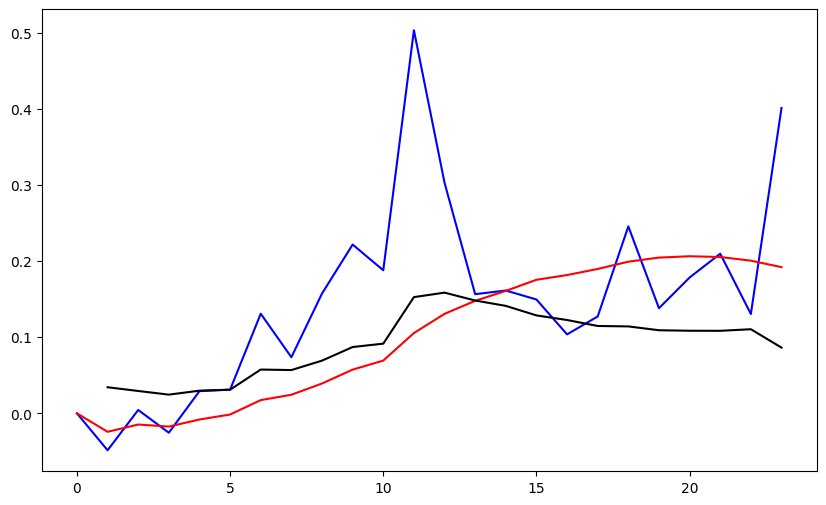

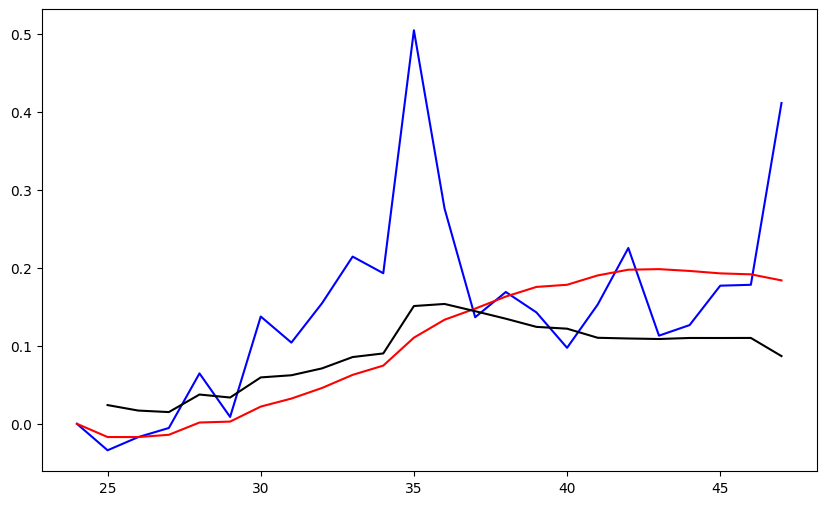

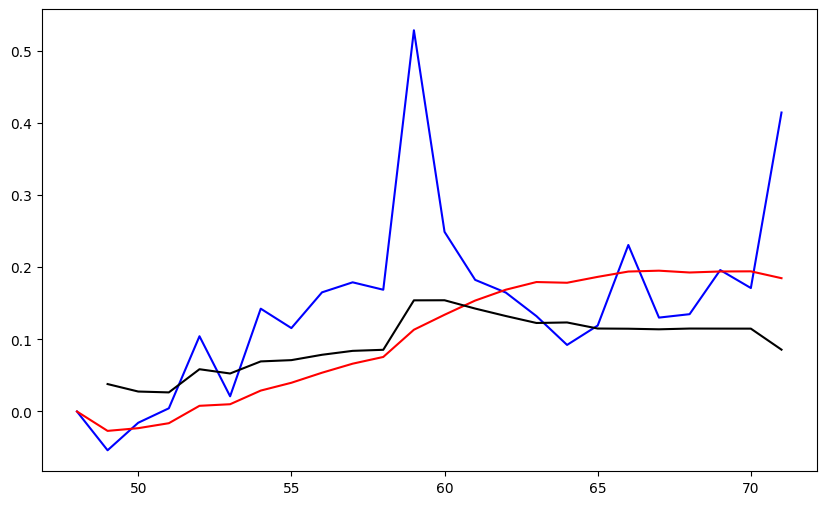

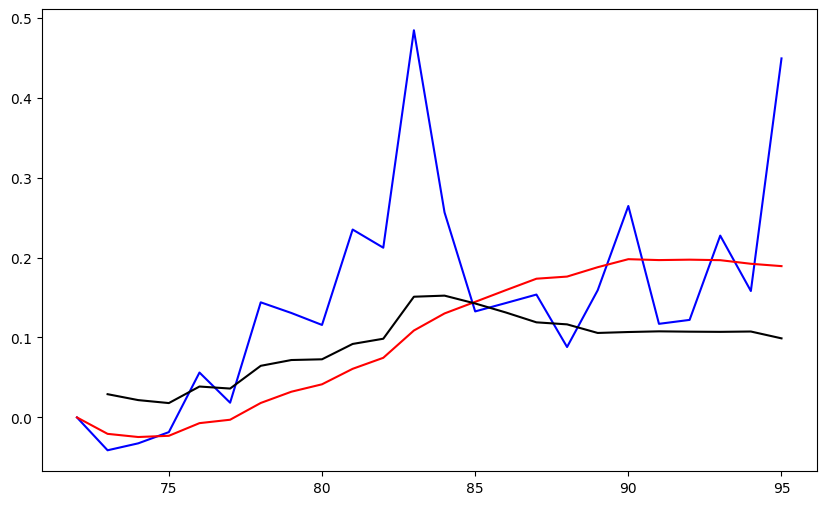

In [ ]:
codigos_produto_unicos = df['Grupo de produtos'].unique()
window=12

for grupo_produto in grupo_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]

    # Estimating trend
    logScale = np.log(df_produto['Valor'])
    movingAverage = logScale.rolling(window,min_periods=1).mean()

    # Transformed dataset
    log_transformed = logScale - movingAverage

    # Determine rolling statistics for the transformed dataset
    movingAverage_transformed = log_transformed.rolling(window,min_periods=1).mean()
    movingSTD_transformed = log_transformed.rolling(window,min_periods=1).std()

    # Plot rolling statistics for the transformed dataset
    plt.figure(figsize=(10, 6))
    plt.plot(log_transformed, color='blue', label='Original')
    plt.plot(movingAverage_transformed, color='red', label='Rolling Mean')
    plt.plot(movingSTD_transformed, color='black', label='Rolling Std')

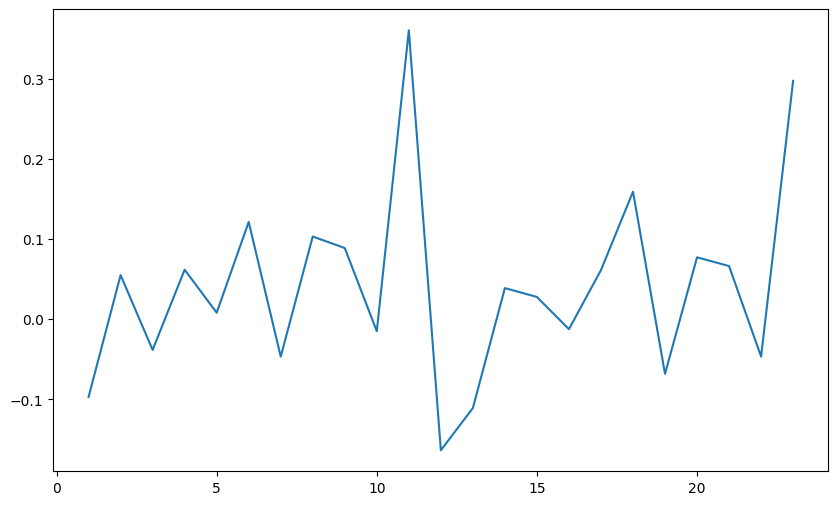

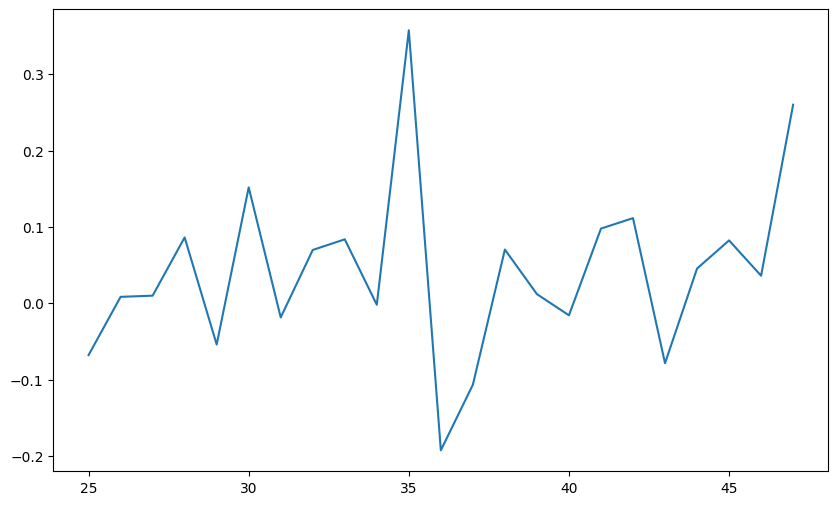

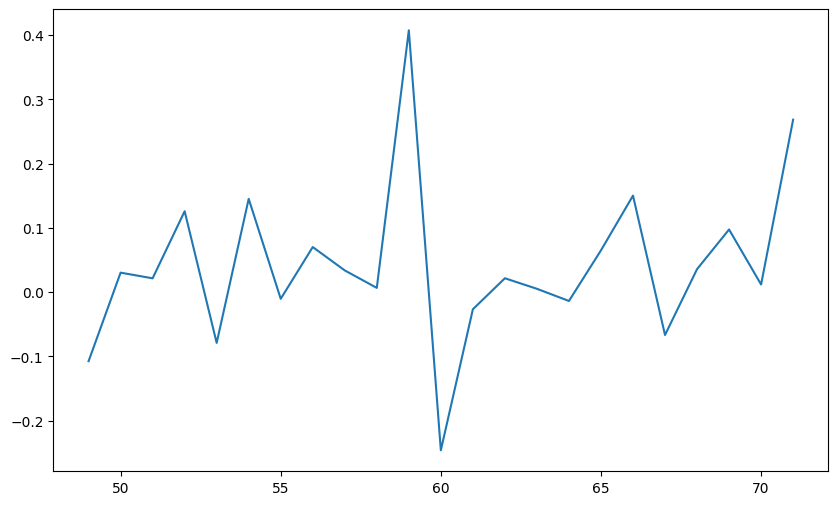

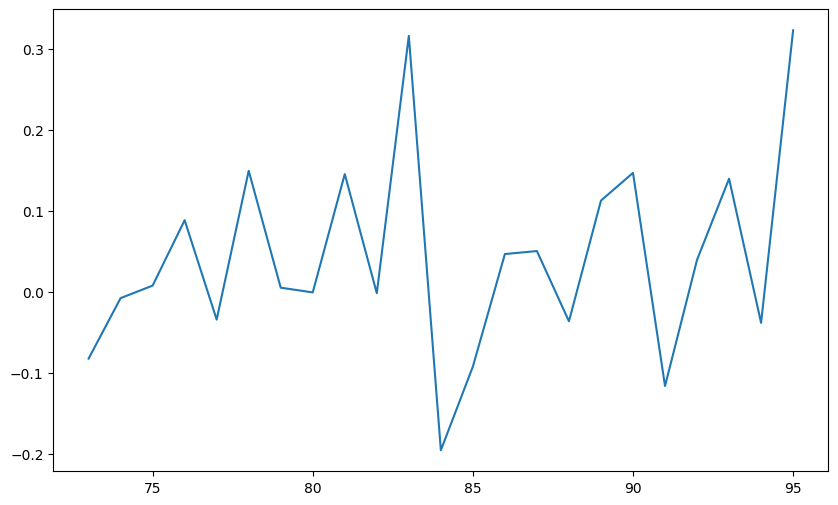

In [ ]:
codigos_produto_unicos = df['Grupo de produtos'].unique()

for grupo_produto in grupo_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]


    # Estimating trend
    logScale = np.log(df_produto['Valor'])

    # Transforming the dataset
    Shifting = logScale - logScale.shift()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(Shifting, label='Differenced LogScale')

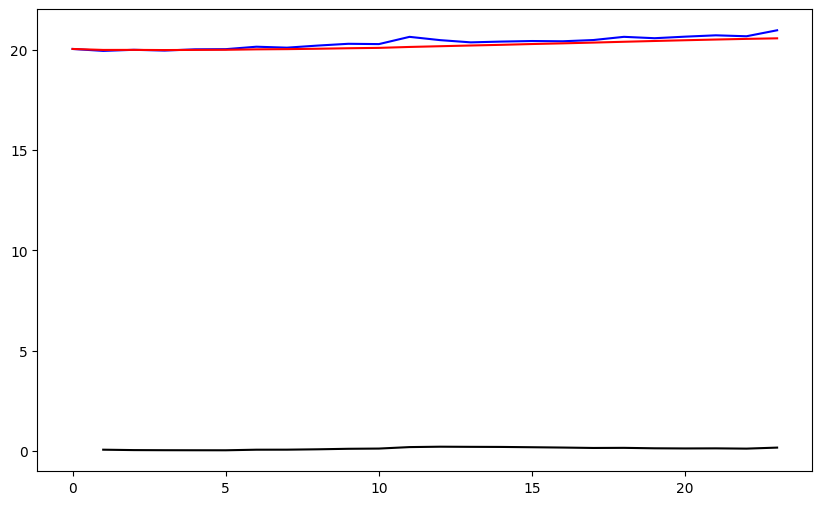

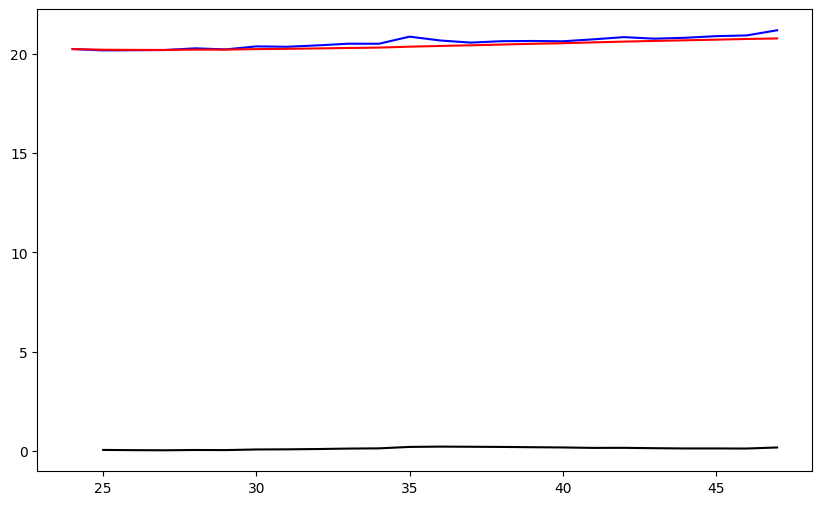

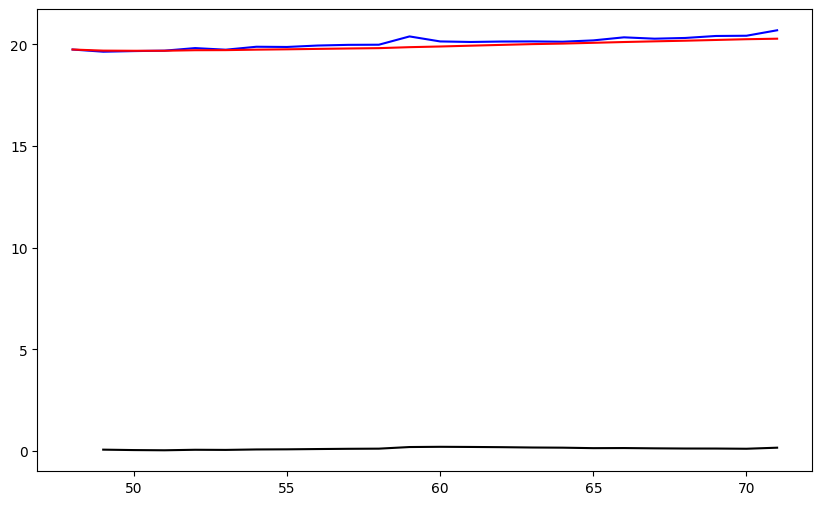

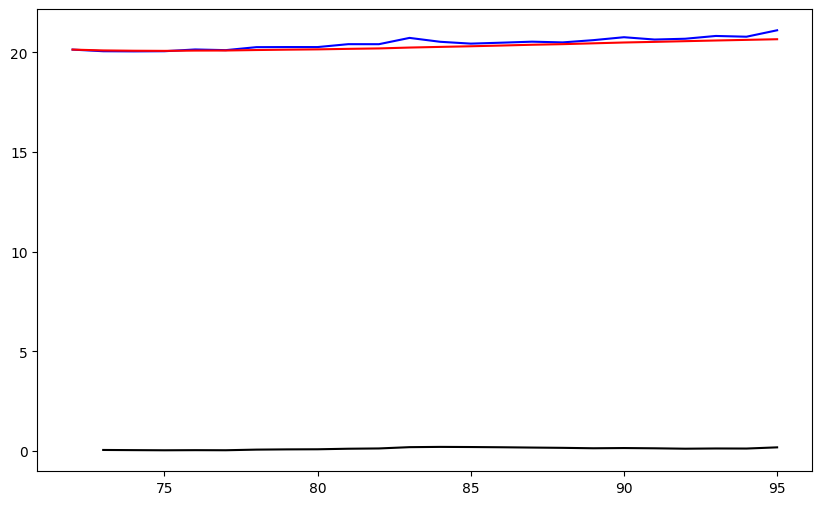

In [ ]:
codigos_produto_unicos = df['Grupo de produtos'].unique()
window=12

for grupo_produto in grupo_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]

    # Estimating trend
    logScale = np.log(df_produto['Valor'])

    # Determine rolling statistics for the transformed dataset
    movingAverage = logScale.rolling(window, min_periods=1).mean()
    movingSTD = logScale.rolling(window, min_periods=1).std()

    # Plot rolling statistics for the transformed dataset
    plt.figure(figsize=(10, 6))
    plt.plot(logScale, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


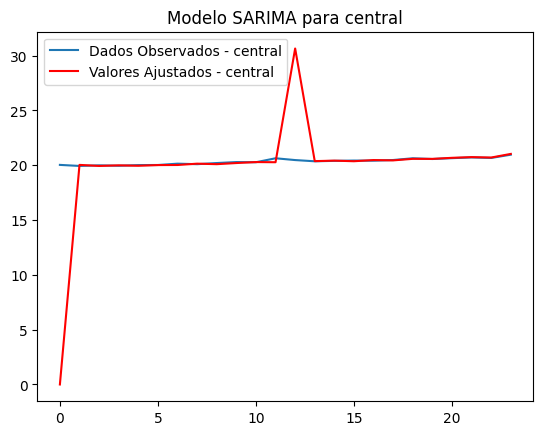

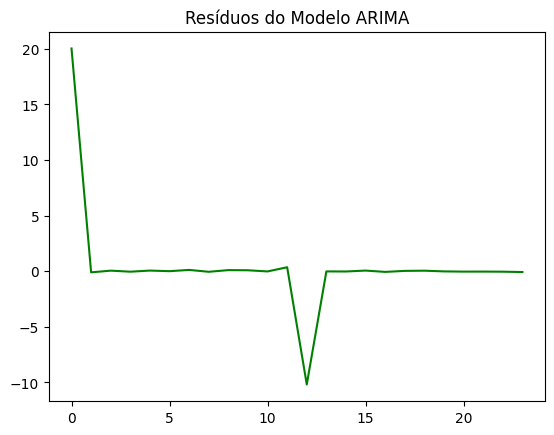

Média dos resíduos: 0.43046029859629115
Estatística ADF: -10.2873330033665
Valor-p: 3.645837500290546e-18


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


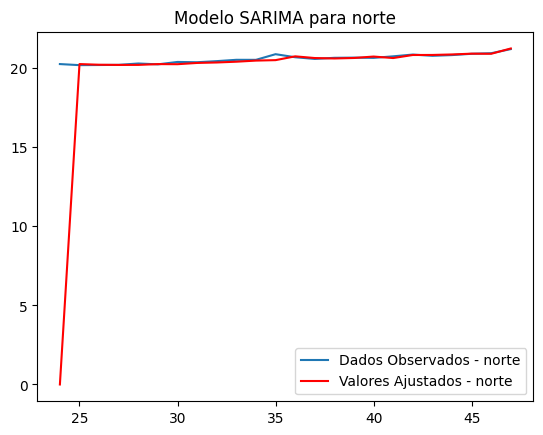

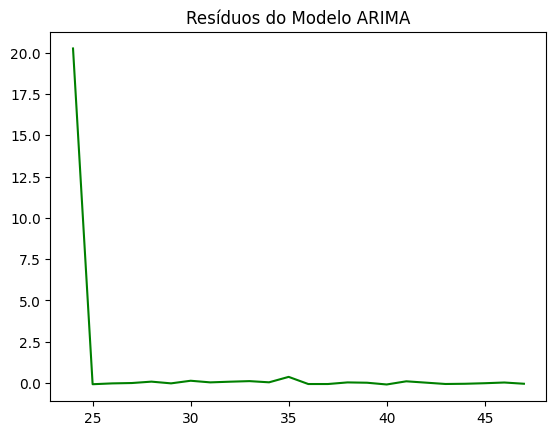

Média dos resíduos: 0.8732150239976902
Estatística ADF: -201.72555635461947
Valor-p: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


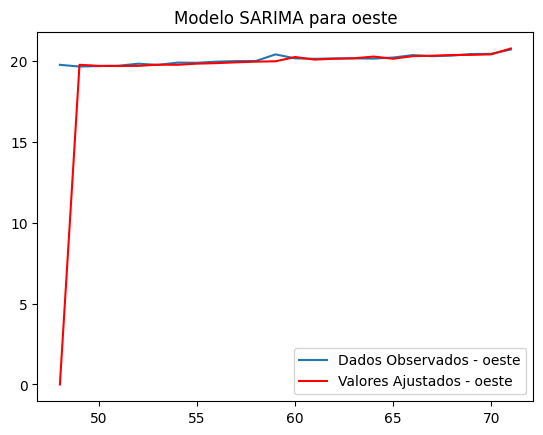

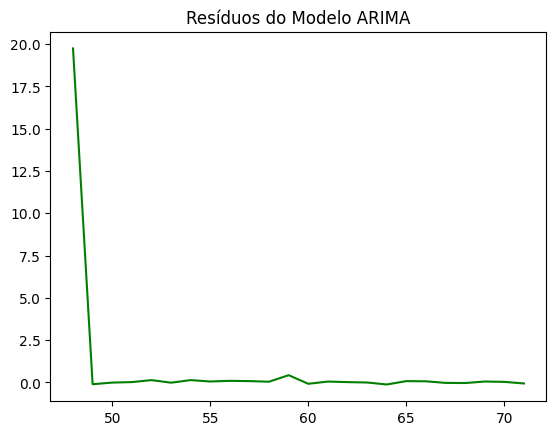

Média dos resíduos: 0.855256154851929
Estatística ADF: -179.8686270277132
Valor-p: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


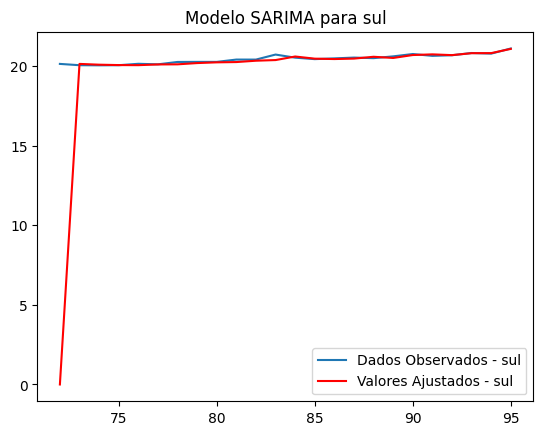

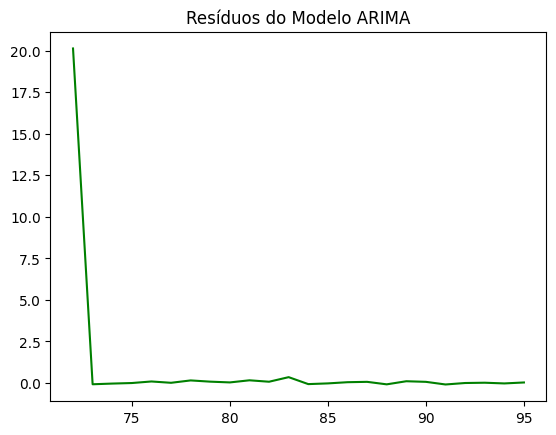

Média dos resíduos: 0.8713901738079307
Estatística ADF: -203.67873809953167
Valor-p: 0.0
         Data Grupo de Produto     Previsões
24 2023-01-31          central  1.099176e+09
25 2023-02-28          central  9.711008e+08
26 2023-03-31          central  9.961731e+08
27 2023-04-30          central  1.083400e+09
28 2023-05-31          central  1.004608e+09
29 2023-06-30          central  1.117631e+09
30 2023-07-31          central  1.353411e+09
31 2023-08-31          central  1.241128e+09
32 2023-09-30          central  1.311761e+09
33 2023-10-31          central  1.375378e+09
34 2023-11-30          central  1.277813e+09
35 2023-12-31          central  1.631550e+09
24 2023-01-31            norte  1.378798e+09
25 2023-02-28            norte  1.253408e+09
26 2023-03-31            norte  1.333643e+09
27 2023-04-30            norte  1.347720e+09
28 2023-05-31            norte  1.329041e+09
29 2023-06-30            norte  1.448622e+09
30 2023-07-31            norte  1.598128e+09
31 2023-08-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Criando um dataframe vazio para armazenar as previsões
df_previsoes = pd.DataFrame(columns=['Data', 'Grupo de Produto', 'Previsões'])

# Obtendo grupos únicos de produtos
grupos_produto_unicos = df['Grupo de produtos'].unique()

for grupo_produto in grupos_produto_unicos:
    df_produto = df[df['Grupo de produtos'] == grupo_produto]

    # Estimando a tendência
    logScale = np.log(df_produto['Valor'])

    # Definindo os parâmetros do SARIMA para cada grupo de produtos (exemplo)
    parametros = {
        'central': {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
        'norte': {'order': (1, 1, 1), 'seasonal_order': (1, 0, 0, 12)},
        'oeste': {'order': (1, 1, 1), 'seasonal_order': (1, 0, 0, 12)},
        'sul': {'order': (1, 1, 1), 'seasonal_order': (1, 0, 0, 12)}
    }
    order = parametros[grupo_produto]['order']
    seasonal_order = parametros[grupo_produto]['seasonal_order']

    # Ajuste do modelo SARIMA para o grupo de produto atual
    sarima_model = SARIMAX(logScale, order=order, seasonal_order=seasonal_order)
    results_sarima = sarima_model.fit()

    # Especificar o número de passos à frente para prever
    n_steps = 12  # Prever 12 meses à frente (correspondendo a todo o ano de 2024)
    forecast = results_sarima.get_forecast(steps=n_steps)
    predicted_values = np.exp(forecast.predicted_mean)
    last_date = df_produto['Data'].max()
    date_range = pd.date_range(start=last_date, periods=n_steps + 1, freq='M')[1:]
    forecast_df = pd.DataFrame({'Data': date_range, 'Grupo de Produto': grupo_produto, 'Previsões': predicted_values})

    # Adicionando as previsões ao dataframe geral de previsões
    df_previsoes = pd.concat([df_previsoes, forecast_df])

    # Plotando os resultados para o grupo de produto atual
    plt.figure()
    plt.plot(logScale, label=f'Dados Observados - {grupo_produto}')
    plt.plot(results_sarima.fittedvalues, color='red', label=f'Valores Ajustados - {grupo_produto}')
    plt.title(f'Modelo SARIMA para {grupo_produto}')
    plt.legend()
    plt.show()

    # Obter os resíduos do modelo ARIMA
    residuals = logScale - results_sarima.fittedvalues

    # Plotar os resíduos
    plt.plot(residuals, color='green')
    plt.title('Resíduos do Modelo ARIMA')
    plt.show()

    # Verificar se os resíduos têm média zero
    print("Média dos resíduos:", np.mean(residuals))

    # Verificar se os resíduos são estacionários (por exemplo, usando um teste ADF)
    adf_result = adfuller(residuals)
    print("Estatística ADF:", adf_result[0])
    print("Valor-p:", adf_result[1])

# Exibindo o dataframe de previsões
print(df_previsoes)

In [ ]:
from google.colab import files

# Formate os valores previstos como números com separador decimal ","
df_previsoes['Previsão_Formatada'] = df_previsoes['Previsões'].apply(lambda x: '{:.2f}'.format(x).replace('.', ','))
# Salve o DataFrame como um arquivo CSV no Colab
df_previsoes.to_csv('Previsão.csv', index=False)

# Use a função files.download() para fazer o download do arquivo para a sua máquina local
files.download('Previsão.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>